In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


In [2]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

In [3]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.mixture import GaussianMixture

# Segundo ejercicio Sklearn

In [16]:
datos_X = pd.read_csv("geyser.csv")
datos_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   waiting   299 non-null    int64  
 1   duration  299 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Text(0.5, 0, 'Duración')

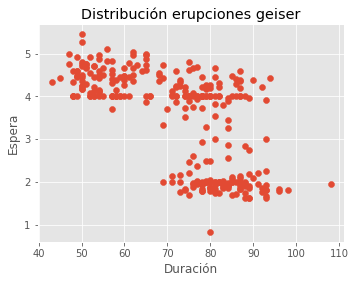

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4))
ax.scatter(datos_X.waiting, datos_X.duration)
ax.set_title('Distribución erupciones geiser')
ax.set_ylabel('Espera')
ax.set_xlabel('Duración')

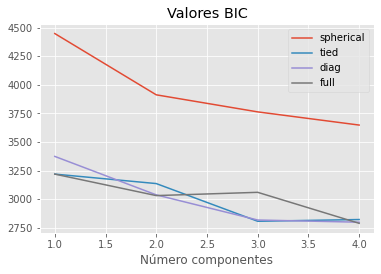

In [18]:
# Tunning del modelo GMM en base a la métrica BIC
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

n_components = range(1, 5)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    
    for i in n_components:
        modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo = modelo.fit(datos_X)
        valores_bic.append(modelo.bic(datos_X))
        
    ax.plot(n_components, valores_bic, label=covariance_type)
        
ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [19]:
# Entrenamiento del modelo GMM
# ==============================================================================
modelo_gmm = GaussianMixture(
                n_components    = 3,
                covariance_type = 'diag',
                random_state    = 123, 
             )

modelo_gmm.fit(X=datos_X)

GaussianMixture(covariance_type='diag', n_components=3, random_state=123)

Text(0.5, 1.0, 'Densidad de probabilidad del modelo')

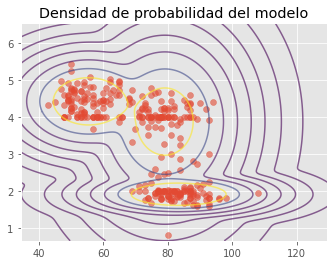

In [20]:
# Predicción densidad de probabilidad
# ==============================================================================
log_probabilidad_predicha = modelo_gmm.score_samples(X=datos_X)
# Mapa de densidad de probabilidad
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4))

# Grid de valores dentro del rango observado
x = np.linspace(min(datos_X.waiting)*0.8, max(datos_X.waiting)*1.2, 1000)
y = np.linspace(min(datos_X.duration)*0.8, max(datos_X.duration)*1.2, 1000)
xx, yy = np.meshgrid(x, y)

# Densidad de probabilidad de cada valor del grid
scores = modelo_gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
scores = np.exp(scores) # Los valores están en log

ax.scatter(datos_X.waiting, datos_X.duration, alpha=0.6)
ax.contour(
    xx, yy, scores.reshape(xx.shape), alpha=0.6,
    levels=np.percentile(scores, np.linspace(0, 100, 10))[1:-1]
)
ax.set_title('Densidad de probabilidad del modelo')

In [21]:
df_resultados = datos_X.copy()
df_resultados['log_proba'] = log_probabilidad_predicha
df_resultados = df_resultados.sort_values(by='log_proba')
top_5_anomalias = df_resultados.head(5)
top_5_anomalias

,waiting,duration,log_proba
148,80,0.833333,-16.088619
60,108,1.950000,-9.569015
11,50,5.450000,-8.253496
242,93,3.000000,-7.851804
131,94,4.416667,-7.599905
269,89,2.750000,-7.205645
40,93,2.266667,-7.041359
207,77,2.383333,-7.039012
132,75,2.466667,-7.035490
61,50,5.266667,-6.877098


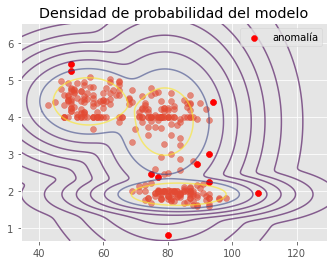

In [22]:
# Mapa de densidad de probabilidad
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4))

# Grid de valores dentro del rango observado
x = np.linspace(min(datos_X.waiting)*0.8, max(datos_X.waiting)*1.2, 1000)
y = np.linspace(min(datos_X.duration)*0.8, max(datos_X.duration)*1.2, 1000)
xx, yy = np.meshgrid(x, y)

# Densidad de probabilidad de cada valor del grid
scores = modelo_gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
scores = np.exp(scores) # Los valores están en log

ax.scatter(datos_X.waiting, datos_X.duration, alpha=0.6)
ax.scatter(top_5_anomalias.waiting, top_5_anomalias.duration, c="red", label='anomalía')
ax.contour(
    xx, yy, scores.reshape(xx.shape),
    alpha=0.6, cmap='viridis',
    levels=np.percentile(scores, np.linspace(0, 100, 10))[1:-1]
)
ax.set_title('Densidad de probabilidad del modelo')
ax.legend()